# Analysis of droplets

This is a cleaned up version of the analysis made by Olof Jönsson 2018-2021 at KTH, together with Niloofar Esmaeildoost and Jonas Sellberg. 

No parts of this code can be used without proper citation. Please contact Olof at olof.jnsson@gmail.com. 


In [1]:
import os

import numpy as np
import cv2
import re  # for string splitting
import h5py

from scipy import signal
from series import Series


import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy.random as np_random
import random
import scipy.stats as stats
import matplotlib.cm as cm
import matplotlib.patches as patches

from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator


import gc
# %matplotlib

### Import of hdf5-data

In [2]:
def read_hdf5(path, filename):
    f = h5py.File('{0}/{1}'.format(path, filename), 'r')
    return f['data']['time'], f['data']['Tave']


# These are the sizes that are in the folder of hdf5 files. Must have the same timesteps
sizes = [3, 5, 10, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

# sizes is the x
x = sizes

# y is the timesteps, and this is taken from the file t_calib_22.h5
time, _ = read_hdf5(
    '../Temperature_sims_and_interpolation/From_Niloo/Temp_sim_Jan2010/', 't_calib_22.h5')
y = list(time[:])

# Create an empy matrix with the size of the sizes and times
temperatures = np.zeros([len(x), len(y)])

# Filling the matrix with actual values measured.
for size_index, size_value in enumerate(sizes):
    _, temperatures[size_index] = read_hdf5(
        '../Temperature_sims_and_interpolation/From_Niloo/Temp_sim_Jan2010/', 't_calib_{0}.h5'.format(size_value))

# This is a function returned by the RegularGridInterpolator
#interpolate_T = interp2d(xx, yy, temperatures, kind='linear',bounds_error=True)
interpolate_T = RegularGridInterpolator((x, y), temperatures)

## Calculating nucleation rate

With Monte Carlo error analysis

### Entering measured data

In [3]:
# First make an object with a name, and a given interpolation function for T
dec7_with_types = Series('Dec 7 with types', interpolate_T)


#Define all the various measured datapoints

counts = np.multiply([633, 566, 298, 325], 1) #Counts of droplets in focus
fractions = [0.0458, 0.362, 0.9865, 1]  # ice fraction for focused
distances = np.multiply([40, 45, 47.5, 50], 0.001)  # in m


#Define all droplet types. 
sideblob_counts = [15, 50, 192, 176]
marbles_counts = [12, 149, 74, 15]
fractured_counts = [2, 6, 28, 134]
water_counts = [604, 361, 4, 0]
water_counts = [604, 361, 4, 2]

type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_counts, water_counts]).T

#Feed this to the set_observables method. 
# d is droplet diameter in m
# s is droplet spacing in m 
# q is flow rate in microliters/min

dec7_with_types.set_observables(frequency=398,
                                d_value=18.145e-6,
                                d_sigma=0.409e-6,
                                s_value=38.676e-6,
                                s_sigma=4.063e-6,
                                q_value=57.5,
                                distances=distances,
                                counts=counts,
                                fractions=fractions,
                                type_counts=type_counts)

# This is with the last half cutout, when the pressure dropped.
nov3_with_types = Series('Nov 3 with types', interpolate_T)

counts = np.multiply([48, 27, 34, 210, 715, 881, 797, 84], 1)
fractions = [0, 0.03, 0.00, 0.06, 0.04, 0.04,
             0.13, 0.35]  # ice fraction for focused
distances = np.multiply([15, 20, 25, 30, 35, 40, 45, 50], 0.001)  # in m

sideblob_counts = [0, 0, 0, 6, 12, 14, 62, 22]
marbles_counts = [0, 1, 0, 5, 12, 13, 31, 21]
fractured_counts = [0, 0, 0, 0, 0, 2, 0, 0]
distorted = [0, 0, 0, 2, 3, 6, 13, 6]
fractured_counts = np.add(fractured_counts, distorted)

# fractured vs distorted
water_counts = [48, 38, 34, 197, 688, 846, 691, 243]

type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_counts, water_counts]).T

nov3_with_types.set_observables(d_value=20.2e-6,
                                d_sigma=0.496e-6,
                                s_value=58.3e-6,
                                s_sigma=3.67e-6,
                                q_value=56.5,
                                distances=distances,
                                counts=counts,
                                fractions=fractions,
                                type_counts=type_counts)


'''
Data from https://docs.google.com/spreadsheets/d/11-GYikog0r1H5IH8vmNHlBlmi4fgEX_WUqMD0C2dIpY/edit#gid=0
and from https://docs.google.com/spreadsheets/d/1VOADjIf649fGTbqI5R4Td48dqzSHE5dx0zcEj2TWAcc/edit#gid=2063575402
'''
mar12_with_types = Series('Mar 12 with types', interpolate_T)
counts = np.multiply([357,
                      183,
                      105,
                      158,
                      113,
                      471,
                      319,
                      406,
                      327,
                      454,
                      206,
                      220], 1)
fractions = [0, 0, 0, 0, 0.01769911504, 0.05732484076, 0.09404388715, 0.06896551724,
             0.07339449541, 0.1696035242, 0.6213592233, 0.9181818182]  # ice fraction for focused

sideblob_counts = [0,
                   0,
                   0,
                   0,
                   1,
                   16,
                   23,
                   19,
                   17,
                   34,
                   50,
                   140]
marbles_counts = [0,
                  0,
                  0,
                  0,
                  1,
                  9,
                  4,
                  4,
                  3,
                  36,
                  70,
                  39]
distorted = [0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 2, 7]
fractured_counts = [0,
                    0,
                    0,
                    0,
                    0,
                    0,
                    0,
                    3,
                    1,
                    5,
                    6,
                    16]
fractured_sum_counts = np.add(fractured_counts, distorted)
water_counts = [357, 183, 105, 158, 111, 444, 289, 378, 303, 377, 78, 18]


type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_sum_counts, water_counts]).T

distances = np.multiply(
    [11, 16, 20, 25, 30, 35, 37.5, 40, 42.5, 45, 47.5, 50], 0.001)  # in m
mar12_with_types.set_observables(d_value=21.44656962e-6,
                                 d_sigma=1.400e-6,
                                 s_value=58.3e-6,
                                 s_sigma=3.67e-6,
                                 q_value=55.1,
                                 distances=distances,
                                 counts=counts,
                                 fractions=fractions,
                                 type_counts=type_counts)


'''
Data from https://docs.google.com/spreadsheets/d/11-GYikog0r1H5IH8vmNHlBlmi4fgEX_WUqMD0C2dIpY/edit#gid=0
and from https://docs.google.com/spreadsheets/d/1VOADjIf649fGTbqI5R4Td48dqzSHE5dx0zcEj2TWAcc/edit#gid=2063575402
'''
mar12_with_types = Series('Mar 12 with types', interpolate_T)
counts = np.multiply([357,
                      183,
                      105,
                      158,
                      113,
                      471,
                      319,
                      406,
                      327,
                      454,
                      206,
                      220], 1)
fractions = [0, 0, 0, 0, 0.01769911504, 0.05732484076, 0.09404388715, 0.06896551724,
             0.07339449541, 0.1696035242, 0.6213592233, 0.9181818182]  # ice fraction for focused

sideblob_counts = [0,
                   0,
                   0,
                   0,
                   1,
                   16,
                   23,
                   19,
                   17,
                   34,
                   50,
                   140]
marbles_counts = [0,
                  0,
                  0,
                  0,
                  1,
                  9,
                  4,
                  4,
                  3,
                  36,
                  70,
                  39]
distorted = [0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 2, 7]
fractured_counts = [0,
                    0,
                    0,
                    0,
                    0,
                    0,
                    0,
                    3,
                    1,
                    5,
                    6,
                    16]
fractured_sum_counts = np.add(fractured_counts, distorted)
water_counts = [357, 183, 105, 158, 111, 444, 289, 378, 303, 377, 78, 18]


type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_sum_counts, water_counts]).T

distances = np.multiply(
    [11, 16, 20, 25, 30, 35, 37.5, 40, 42.5, 45, 47.5, 50], 0.001)  # in m
mar12_with_types.set_observables(d_value=21.44656962e-6,
                                 d_sigma=1.400e-6,
                                 s_value=58.3e-6,
                                 s_sigma=3.67e-6,
                                 q_value=55.1,
                                 distances=distances,
                                 counts=counts,
                                 fractions=fractions,
                                 type_counts=type_counts)

'''
Data from https://docs.google.com/spreadsheets/d/1vLBLDDu8vQx1R1nRL9ML0Zp7wrktrKi3laL0rhxsNr8/edit#gid=81409557
'''
may11_with_types = Series('May 11 2021', interpolate_T)
counts = np.multiply([342,304,450,599], 1)
fractions = [0.005847953216,0.01644736842,0.08666666667,0.3372287145]  # ice fraction for focused

sideblob_counts = [0,2,10,35]
marbles_counts = [2,3,29,166]
distorted = [0,0,0,0]
fractured_counts = [0,0,0,1]
fractured_sum_counts = np.add(fractured_counts, distorted)
water_counts = [340,299,411,397]


type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_sum_counts, water_counts]).T

distances = np.multiply(
    [37,42,45,47.77], 0.001)  # in m
may11_with_types.set_observables(s_value=80.4771e-6,
                                 s_sigma=1.2677e-6,
                                 d_value=24.9751e-6,
                                 d_sigma=0.3930e-6,
                                 q_value=58.07142857,
                                 distances=distances,
                                 counts=counts,
                                 fractions=fractions,
                                 type_counts=type_counts)

/Users/olofjonsson/Projects/Ice/Droplet_codes/Examples/series.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if type_counts[0] != 'korv':
/Users/olofjonsson/Projects/Ice/Droplet_codes/Examples/series.py:333: RuntimeWarning: divide by zero encountered in true_divide
  the_log = np.log(np.divide(np.subtract(1, f_2), np.subtract(1, f_1)))
/Users/olofjonsson/Projects/Ice/Droplet_codes/Examples/series.py:364: RuntimeWarning: divide by zero encountered in log
  fractions_log=np.log(np.subtract(1,fractions)) #It's the water fractions we use


### Running the error simulation and saving the results

Use as many trials as needed, until the values converge

In [4]:
experiments = [dec7_with_types, nov3_with_types, mar12_with_types,may11_with_types]
#experiments=[may11_with_types]



trials = 10 #This is the number of trials
results_path='Results_MC'


for series in experiments:
    print(series.descriptor)
    series.calculate_errors(percentile=15.865, do_J=True, trials=trials)
    series.generate_plotting_label()
    series.save_column_file(results_path)



Dec 7 with types


/Users/olofjonsson/Projects/Ice/Droplet_codes/Examples/series.py:196: RuntimeWarning: invalid value encountered in subtract
  self.low_J_err_at_calculated = np.subtract(self.ideal_J_at_calculated, self.low_J_at_calculated)
/Users/olofjonsson/Projects/Ice/Droplet_codes/Examples/series.py:197: RuntimeWarning: invalid value encountered in subtract
  self.high_J_err_at_calculated = np.subtract(self.high_J_at_calculated, self.ideal_J_at_calculated)
/Users/olofjonsson/Projects/Ice/Droplet_codes/Examples/series.py:204: RuntimeWarning: invalid value encountered in subtract
  self.low_J_err = np.subtract(self.ideal_J, self.low_J)
/Users/olofjonsson/Projects/Ice/Droplet_codes/Examples/series.py:205: RuntimeWarning: invalid value encountered in subtract
  self.high_J_err = np.subtract(self.high_J, self.ideal_J)


Nov 3 with types
Mar 12 with types
May 11 2021


### Example of how to extract data

This is to extract data straight out from the objects, in this case to make a plot

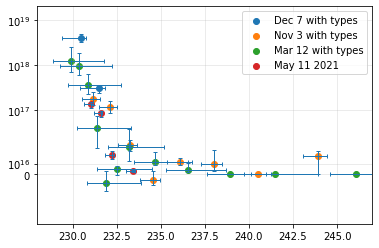

In [5]:
plt.figure()
ax2=plt.gca()
for series in experiments:
    
    xerr = np.array([series.low_T_err_at_measured, series.high_T_err_at_measured])
    yerr = np.array([series.low_J_err, series.high_J_err])

    ax2.scatter(series.ideal_T_at_measured,
               series.ideal_J,label=series.descriptor)
    ax2.errorbar(series.ideal_T_at_measured,
                series.ideal_J,
                xerr=xerr,
                yerr=yerr,
                fmt='none',
                capsize=2, lw=1)
ax2.legend()

ax2.set_yscale('symlog', linthresh=5e16)
ax2.set_ylim(bottom=-0.5e17,top=2e19)
ax2.set_xlim(left=228,right=247)
ax2.grid(alpha=0.3)

### Example of how to extract data from all trials

Text(0, 0.5, 'temperatures')

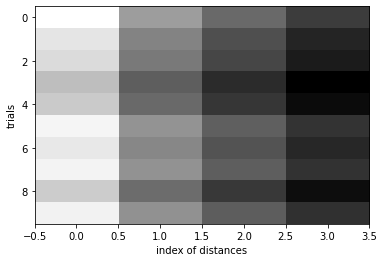

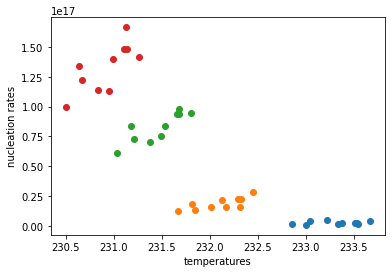

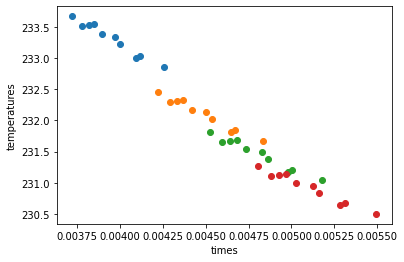

In [11]:
#generate a colormap showing bad datapoints
cmap_with_bad = plt.get_cmap('gray').with_extremes(bad='r', under='g', over='b')

#extract the matrices of all trials
temperatures=may11_with_types.T_MC_matrix_at_measured 
times=may11_with_types.t_MC_matrix_at_measured 
velocities=may11_with_types.v_MC_matrix_at_measured 
nucleation_rates=may11_with_types.J_MC_matrix_at_measured

#extract the distances
distances=may11_with_types.measured_distances

#these matrices have dimension number of trials*number of distances
plt.figure()
plt.imshow(temperatures,interpolation='none',aspect='auto',cmap=cmap_with_bad)
plt.xlabel('index of distances')
plt.ylabel('trials')


#nucleation rates, all points
plt.figure()
for distance_index,distance in enumerate(distances):
    plt.scatter(temperatures[:,distance_index],nucleation_rates[:,distance_index])
plt.xlabel('temperatures')
plt.ylabel('nucleation rates')
    
#temperature vs time, all points
plt.figure()
for distance_index,distance in enumerate(distances):
    plt.scatter(times[:,distance_index],temperatures[:,distance_index])
plt.xlabel('times')
plt.ylabel('temperatures')

### Dealing with fraction matrices

Each point is a simulated fraction.

Each row will sum to 1, and represents the types in the same order as inputed, here is is sideblobs, marbles, fractured, water.

each column is one distance.

[[0.         0.00292398 0.         0.99707602]
 [0.00328947 0.01315789 0.         0.98355263]
 [0.01777778 0.07555556 0.         0.90666667]
 [0.05008347 0.28380634 0.00166945 0.66444073]]


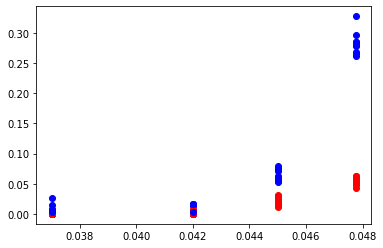

In [10]:
fractions=may11_with_types.type_fraction_MC_matrix_at_measured
#This is a matrix for the first trial
print(fractions[0])


#plotting sideblobs for each distance
sideblobs=[]
marbles=[]
distances=may11_with_types.measured_distances
for fraction_block in fractions:
    
    sideblob_evolution_in_this_trial=fraction_block[:,0]
    sideblobs.append(sideblob_evolution_in_this_trial) #sideblobs have index 0, see above
    
    marbles_evolution_in_this_trial=fraction_block[:,1]
    marbles.append(marbles_evolution_in_this_trial) #marbles have index 0, see above
    
    plt.scatter(distances,sideblob_evolution_in_this_trial,alpha=1,color='red')
    plt.scatter(distances,marbles_evolution_in_this_trial,alpha=1,color='blue')